In [1]:
from math import sin, cos, log, ceil
import numpy

from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
g = 9.81
v = 0
ms = 50
mp = 100
r = 0.5
density = 1.091
ve = 325
C_D = 0.15
h = 0
mp_rate = 20

In [3]:
dt = 0.1
u = numpy.empty((10000,4))

In [4]:
t = 0
i = 0
while t <= 50:
    u[i,0] = t
    u[i,1] = v
    u[i,2] = h
    u[i,3] = mp
    h = h + v * dt
    if mp > 0:
        v = v + (-(ms+mp)*g+mp_rate*ve-1/2*density*v*numpy.abs(v)*numpy.pi*r*r*C_D)/(ms+mp)*dt
        mp = mp - mp_rate * dt
    else:
        mp = 0
        mp_rate = 0
        v = v + (-(ms+mp)*g+mp_rate*ve-1/2*density*v*numpy.abs(v)*numpy.pi*r*r*C_D)/(ms+mp)*dt
    
    if h <= -3:
        break
    t = t + dt
    i = i +1

In [5]:
time = u[:i+1,0]
velocity = u[:i+1,1]
altitude = u[:i+1,2]

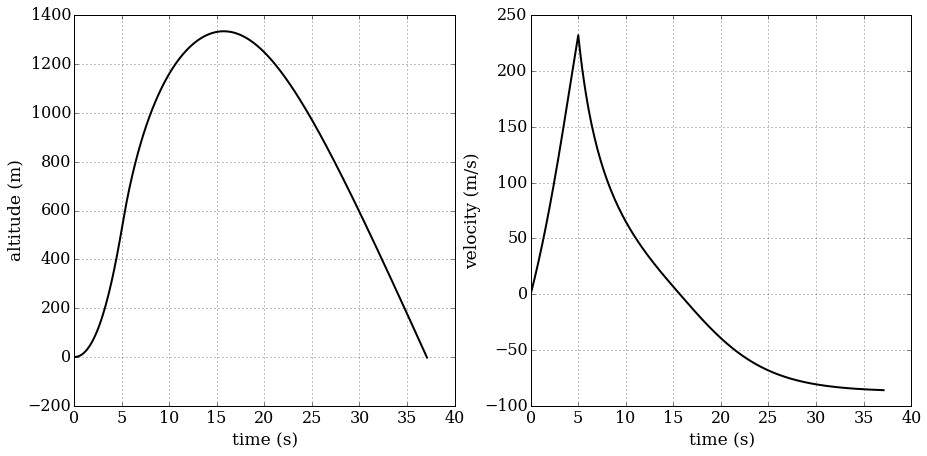

In [6]:
pyplot.figure(figsize=(15,7))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel(r'time (s)', fontsize=17)
pyplot.ylabel(r'altitude (m)', fontsize=17)
pyplot.plot(time,altitude, 'k-', lw=2);

pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel(r'time (s)', fontsize=17)
pyplot.ylabel(r'velocity (m/s)', fontsize=17)
pyplot.plot(time,velocity, 'k-', lw=2);